# Взяти файл з даними у вiдповiдностi з варiантом

In [44]:
import csv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
import time

In [2]:
data = pd.read_csv('Var_1_BreadBasket_DMS.csv')
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


**Діаграма із товарами, які покупали найчастіше:**

In [10]:
df = data.drop(data[data.Item == 'NONE'].index)

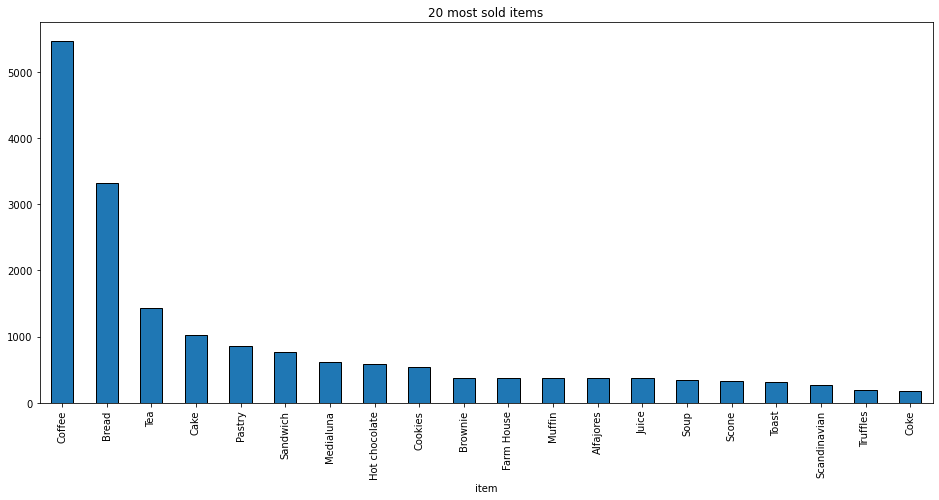

In [91]:
fig, ax = plt.subplots(figsize=(16,7))
df['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5, edgecolor='k', linewidth=1)
plt.xlabel('item')
ax.tick_params()
plt.title('20 most sold items')
plt.show()

Отже, найчастіше люди купували кофе, хліб та чай.

In [14]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['Week'] = df['datetime'].dt.week
df['Month'] = df['datetime'].dt.month
df['Weekday'] = df['datetime'].dt.weekday
df['Hours'] = df['datetime'].dt.hour

<ipython-input-14-7d354e4a1741>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['datetime'].dt.week


In [15]:
df1 = df[['Date', 'Transaction', 'Month', 'Week', 'Weekday', 'Hours']]

**У який день було здійснено найбільшу кількість покупок:**

<AxesSubplot:xlabel='Weekday', ylabel='count'>

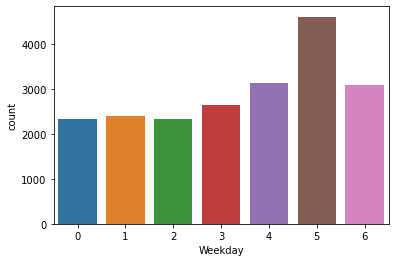

In [17]:
sns.countplot(x='Weekday', data=df1)

Тобто, найчастіше покупки здійснювалися у суботу, що й не дивно, оскільки це вихідний день.

**Розподіл частоти покупок по годинах:**

<AxesSubplot:xlabel='Hours', ylabel='count'>

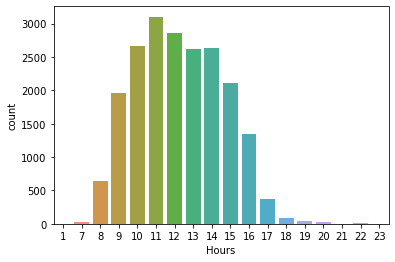

In [18]:
sns.countplot(x='Hours', data=df1)

# Побудувати частi набори та асоцiативнi правила (АП), використовуючи алгоритм Apriori

Приведемо усі дані до бінарного вигляду.

In [67]:
hot_encoded_df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [68]:
def encode(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [69]:
hot_encoded_df = hot_encoded_df.applymap(encode)

Нормалізований вид бази даних транзакцій. Кількість стовпців в таблиці дорівнює кількості елементів, присутніх у великій кількості транзакцій. Кожен запис відповідає транзакції, де у відповідних стовпці стоїть 1, якщо елемент присутній в транзакції, і 0 - в іншому випадку.

In [70]:
hot_encoded_df

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
frequent_itemsets_apriori = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)
rules_ap = association_rules(frequent_itemsets_apriori, metric='lift', min_threshold=1)
rules_ap.sort_values('confidence', ascending = False, inplace = True)

In [40]:
rules_ap.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
0,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


**Support** - це вказівка на те, як часто набір елементів з’являється у наборі даних.

**Confidence** є показником того, як часто правило виявляється істинним.

Наприклад, з останнього правила ми бачимо, що тост і каву зазвичай купують разом. Це має сенс, оскільки люди, які купують тости, хотіли б випити з ними кави.

Значення підтримки для цього правила становить 0,023666. Це число обчислюється діленням кількості транзакцій, що містять тост, на загальну кількість транзакцій. Рівень довіри до правила становить 0,704403, що показує, що з усіх транзакцій, які містять тост, 70,44% транзакцій також містять каву. Нарешті, підйом на 1,47 говорить нам, що кава в 1,47 рази частіше купується клієнтами, які купують тости, порівняно із ймовірністю продажу кави.

## Варіювання параметрів алгоритму Apriori

**Параметри:**

min_support – мінімальне порогове значення підтримки Supp

max_len – максимальна довжина набору при пошуку частих наборів (потужність)

min_confidence – мінімальне порогове значення достовірності Conf

In [53]:
def variate_params_ap(min_supports, max_lens, min_confidences):
    ms, ml, mc = [], [], []
    results, time_hist = [], []
    for sup in min_support:
        for leng in max_len:
            for conf in min_confidence:
                t = time.process_time()
                frequent_itemsets = apriori(hot_encoded_df, min_support = sup, max_len = leng, use_colnames=True)
                rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
                fin_time = time.process_time() - t
                ms.append(sup)
                ml.append(leng)
                mc.append(conf)
                time_hist.append(fin_time)
                results.append(np.where(np.array(rules.lift) > 1, 1, 0).sum())
    return pd.DataFrame({"min_support": ms, "max_len": ml, "min_confidences": mc, "Num with lift>1": results, "time": time_hist})

In [54]:
min_support = [0.001, 0.005, 0.01]
max_len = [2, 3, 4]
min_confidence = [0.3, 0.4, 0.5]
variate_params_ap(min_support, max_len, min_confidence).sort_values('time').style.hide_index()

min_support,max_len,min_confidences,Num with lift>1,time
0.010000,2,0.300000,34,0.030300
0.010000,2,0.500000,34,0.030462
0.010000,2,0.400000,34,0.030718
0.005000,2,0.400000,80,0.041347
0.005000,2,0.500000,80,0.041377
0.010000,4,0.500000,42,0.044535
0.010000,3,0.500000,42,0.045616
0.010000,4,0.400000,42,0.045931
0.010000,3,0.400000,42,0.046444
0.010000,4,0.300000,42,0.046568


Видно підтвердження властивості антимонотонності: зі збільшенням параметрів $supp_ {min}$ і $conf_ {min}$ кількість значущих АП зменшується.
Аналогічна ситуація спостерігається і з часом побудови АП: чим більше знайдено частих наборів, тим більше АП, а, отже, більше час їх побудови. Параметр max_len впливає на кількість знайдених АП прямо пропорційно, через що збільшується час роботи.
Так як висока кількість значущих правил не є мірою якості алгоритму з відповідними параметрами, то виберемо параметри, для яких час роботи найменший (для наступних пунктів роботи). Отже, параметри є наступними:
min_support = 0.01
min_confidences = 0.3
max_len = 2

# Побудувати частi набори та множину АП, використовуючи алгоритм FP-росту.

In [71]:
frequent_itemsets_fp = fpgrowth(hot_encoded_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets_fp, metric='lift', min_threshold=1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
40,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
14,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
8,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
32,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
16,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
30,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
18,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
38,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
4,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


## Варіювання параметрів алгоритму FPG

In [56]:
def variate_params_fpg(min_supports, max_lens, min_confidences):
    ms, ml, mc = [], [], []
    results, time_hist = [], []
    for sup in min_support:
        for leng in max_len:
            for conf in min_confidence:
                t = time.process_time()
                frequent_itemsets = fpgrowth(hot_encoded_df, min_support = sup, max_len = leng, use_colnames=True)
                rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
                fin_time = time.process_time() - t
                ms.append(sup)
                ml.append(leng)
                mc.append(conf)
                time_hist.append(fin_time)
                results.append(np.where(np.array(rules.lift) > 1, 1, 0).sum())
    return pd.DataFrame({"min_support": ms, "max_len": ml, "min_confidences": mc, "Num with lift>1": results, "time": time_hist})

In [58]:
min_support = [0.001, 0.005, 0.01]
max_len = [2, 3, 4]
min_confidence = [0.3, 0.4, 0.5]
variate_params_fpg(min_support, max_len, min_confidence).sort_values('time').style.hide_index()

min_support,max_len,min_confidences,Num with lift>1,time
0.010000,3,0.500000,42,0.051302
0.010000,3,0.400000,42,0.051461
0.010000,4,0.300000,42,0.052648
0.010000,2,0.300000,34,0.052771
0.010000,2,0.500000,34,0.053129
0.010000,3,0.300000,42,0.053497
0.010000,2,0.400000,34,0.053900
0.010000,4,0.400000,42,0.054736
0.005000,3,0.300000,104,0.055954
0.005000,4,0.500000,104,0.056060


Аналогічно алгоритму Apriori видно підтвердження властивості антімонотонності.
Аналогічна ситуація спостерігається і з часом побудови АП: чим більше знайдено частих наборів, тим більше АП, а, отже, більше час їх побудови. Параметр max_len впливає на кількість знайдених АП прямо пропорційно, через що збільшується час роботи.
Так як велика кількість значущих правил не є мірою якості алгоритму з відповідними параметрами, то виберемо параметри, для яких час роботи найменше (для наступних пунктів роботи). Разом значення:
min_support = 0.01
min_confidences = 0.5
max_len = 3

# Знайти значення прогнозу на основi побудованої множини правил

In [59]:
def get_recommendations(rules: pd.DataFrame, recommend_for: set):
    consequents = rules[rules.antecedents == frozenset(recommend_for)].drop(columns=["antecedents"]).sort_values("confidence", ascending=False).set_index("consequents")
    print(f"With this product people usually buy")
    display(consequents)

## Apriori

In [60]:
frequent_itemsets_apr = apriori(hot_encoded_df, min_support = 0.01, max_len = 2, use_colnames=True)
rules_apr = association_rules(frequent_itemsets_apr, metric='lift', min_threshold=0.3)
get_recommendations(rules_apr, {"Cookies"})

With this product people usually buy


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
consequents,,,,,,,
(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
(Bread),0.054411,0.327205,0.014474,0.266019,0.813004,-0.003329,0.916638


In [61]:
get_recommendations(rules_apr, {"Sandwich"})

With this product people usually buy


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
consequents,,,,,,,
(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
(Bread),0.071844,0.327205,0.017010,0.236765,0.723596,-0.006498,0.881503
(Tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712


## FPGrowth

In [72]:
frequent_itemsets_fpg = fpgrowth(hot_encoded_df, min_support = 0.01, max_len = 3, use_colnames=True)
rules_fpg = association_rules(frequent_itemsets_fpg, metric='lift', min_threshold=0.3)
get_recommendations(rules_fpg, {"Tea"})

With this product people usually buy


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
consequents,,,,,,,
(Coffee),0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014
(Bread),0.142631,0.327205,0.028104,0.197037,0.602181,-0.018566,0.837890
(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
(Sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134
"(Cake, Coffee)",0.142631,0.054728,0.010037,0.070370,1.285822,0.002231,1.016827


In [73]:
get_recommendations(rules_fpg, {"Cake"})

With this product people usually buy


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
consequents,,,,,,,
(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
(Tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
(Bread),0.103856,0.327205,0.023349,0.224822,0.687097,-0.010633,0.867923
(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779
"(Bread, Coffee)",0.103856,0.090016,0.010037,0.096643,1.073621,0.000688,1.007336


# Порiвняти результати, отриманi алгоритмами Apriori та FP

Отже, в результаті виконаних досліджень, можна зробити висновок, що результати, отримані за допомогою використання обох алгоритмів, є досить схожими, однак відрізняється час для формування частих наборів.
Покажемо це за допомогою побудови графіка витраченого часу на побудову АП для випадкової підмножини даних.

In [74]:
def association_rules_time(dataset, ms, ml, mc, apr = True):
    t = time.process_time()
    if apr == True:
        frequent_itemsets = apriori(dataset, min_support=ms, max_len=ml, use_colnames=True)
    else:
        frequent_itemsets = fpgrowth(dataset, min_support=ms, use_colnames=True, max_len=ml)
    rules = association_rules(frequent_itemsets, metric='lift', min_threshold=mc)
    return time.process_time() - t

Text(0.5, 1.0, 'Time for fitting to training samples')

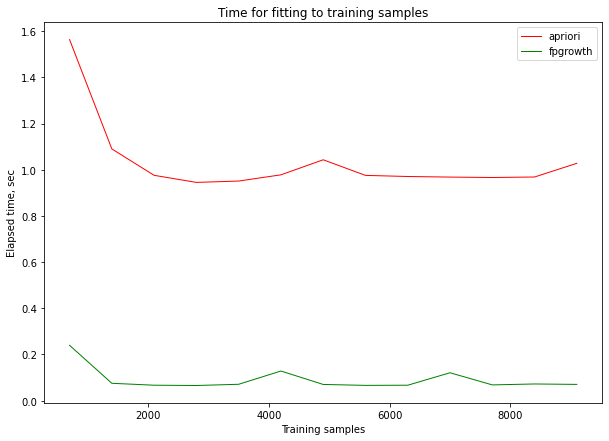

In [90]:
apriori_time, fpgrowth_time = [], []
some_samples = range(700, hot_encoded_df.shape[0], 700)
for samples in some_samples:
    a_time = association_rules_time(dataset = hot_encoded_df, ms=0.001, ml=4, mc=0.4)
    apriori_time.append(a_time)
    fp_time = association_rules_time(dataset = hot_encoded_df, ms=0.001, ml=4, mc=0.4, apr=False)
    fpgrowth_time.append(fp_time)
    
plt.figure(figsize=(10, 7))
plt.plot(some_samples, np.array(apriori_time), c='r', label='apriori', linewidth=1)
plt.plot(some_samples, np.array(fpgrowth_time), c='g', label='fpgrowth', linewidth=1)
plt.legend()
plt.xlabel('Training samples')
plt.ylabel('Elapsed time, sec')
plt.title('Time for fitting to training samples')

Результат підтверджує: алгоритм FPG значно швидше алгоритму Apriori.

In [88]:
def supp_conf_plot(rules):
    support = rules[['support']].values
    confidence = rules[['confidence']].values

    for i in range (len(support)):
        support[i] = support[i]
        confidence[i] = confidence[i]

    plt.title('Assonciation Rules')
    plt.xlabel('support')
    plt.ylabel('confidance')
    sns.regplot(x=support, y=confidence, fit_reg=False)

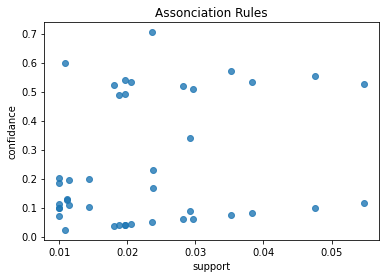

In [89]:
supp_conf_plot(rules_ap)

# Висновок

У процесі виконання даного практикуму я досліджувала два алгоритму: Apriori і FP-Growth, які використовуються для побудови частих наборів товарів по заданих транзакціями, щоб, використавши ці дані, побудувати асоціативні правила, які дозволяють зрозуміти, які товари купуються разом.

В першу чергу це корисно маркетологам інтернет-магазинів для прийняття зважених рішень, спрямованих на опрацювання сценаріїв взаємодії з користувачами. Варто також відзначити, що такий аналіз буде корисний інтернет-магазинах, де в «чеку», як правило, не один товар, а набір різних товарів - наприклад, будь-який продуктовий рітейл.

Метою застосування аналізу ринкового кошика в роздрібній торгівлі зазвичай є: створення бізнес-шаблонів покупок,
оптимізація асортименту товарів і їх запасів,
оптимізація розміщення товарів на вітринах і в торгових залах (щоб товари з одного шаблону розміщувалися поруч один з одним),
підвищення ефективності маркетингових компаній і промоакцій (наприклад, пропонувати знижку на всі товари з шаблонів),
зниження вартість рекламних компаній з метою зробити їх більш цілеспрямованими.